# Do Jockeys have a significant impact on the performance of a horse?

This notebook is designed to begin exploring the data we scrapped from the HK site earlier.  Most of the exploration will focus around the performance of jockeys across multiple races and horses to create some baseline information we can use to judge future comparisons and analysis by. We'll compare the ranks of various jockeys and horses with each other, as well as what ranks specific jockeys are able to get on average with specific horses. 

## Import

In [2]:
import pandas as pd 
pd.set_option('display.max_columns', 30)
import numpy as np 

from matplotlib.pylab import plt
import seaborn as sns

import os

%matplotlib inline

## Load Data

In [3]:
hk_analysis = pd.read_csv(os.getcwd() + '\\project_files\\finished_hkhorses.csv')
hk_analysis.shape

(17303, 24)

In [4]:
print("# Unique IDs: ", hk_analysis['ID'].nunique(), "    # Unique Jockeys: ", hk_analysis['jockey'].nunique())

# Unique IDs:  1236     # Unique Jockeys:  142


## Filter Imported Data

Below we filter out any jockeys who have not ridden at least a given minimum number of times to try and prevent any outliers from appearing in our data.  While this could've been done in the earlier cleaning steps, I felt it was better to do it here so that the finished_hkhorses.csv would contain ALL finished races. 

In [5]:
min_occurrences = 2

jockey_count = hk_analysis.jockey.value_counts()

filtered_hk_pre = hk_analysis[hk_analysis.jockey.isin(jockey_count.index[jockey_count.gt(min_occurrences)])]
horse_count = filtered_hk_pre.ID.value_counts()

filtered_hk = filtered_hk_pre[filtered_hk_pre.ID.isin(horse_count.index[horse_count.gt(min_occurrences)])]
print("# Unique IDs: ", filtered_hk['ID'].nunique(), "    # Unique Jockeys: ", filtered_hk['jockey'].nunique())

# Unique IDs:  945     # Unique Jockeys:  82


As you can see, we ended up filtering out a fair number of jockeys who only appeared a few times in the original dataset. 

## Visualizations 

Create lists of mean ranks for both jockeys and horses to be shown in the histogram below. 

In [6]:
mean_horse_rank = filtered_hk.groupby('ID').mean()['rank']
mean_jockey_rank = filtered_hk.groupby('jockey').mean()['rank']
mean_jockey_rank.sample(3)

jockey
Z. Purton     4.424978
J. Moreira    4.231286
M. F. Poon    6.212880
Name: rank, dtype: float64

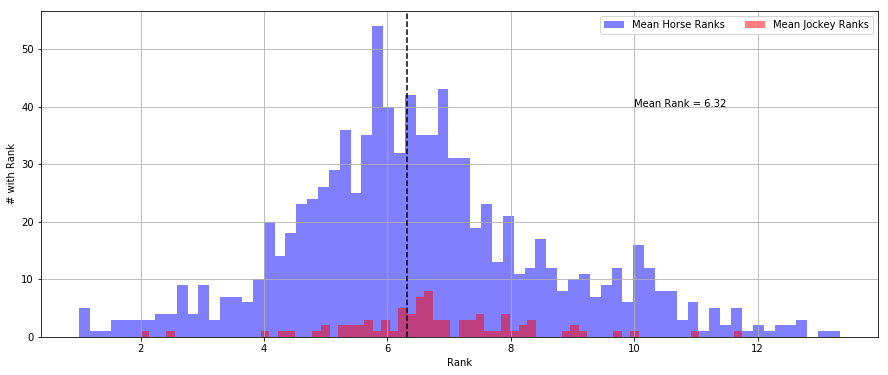

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))

mean_horse_rank.hist(ax=ax, alpha=.5, bins=70, color='blue', label='Mean Horse Ranks')
mean_jockey_rank.hist(ax=ax, alpha=.5, bins=70, color='red', label='Mean Jockey Ranks')

rank_median = filtered_hk['rank'].mean()

ax.axvline(rank_median, ls='--', c='black')

ax.annotate('Mean Rank = {:.2f}'.format(rank_median), xy=(10, 40))

ax.set_xlabel('Rank')
ax.set_ylabel('# with Rank')
ax.legend(ncol=2)

Right away we can see that the rankings of both horses and jockeys follow a normal distribution with a mean value pretty dead in the middle between 1-12, which pretty much should be expected (as few races have above 12 positions). 

By pivoting our data, we're able to create a dataframe that shows the mean rank any particular jockey obtains with any particular horse. (NaN/Blank values obviously representing a combination that hasn't performed in a race on record.) 

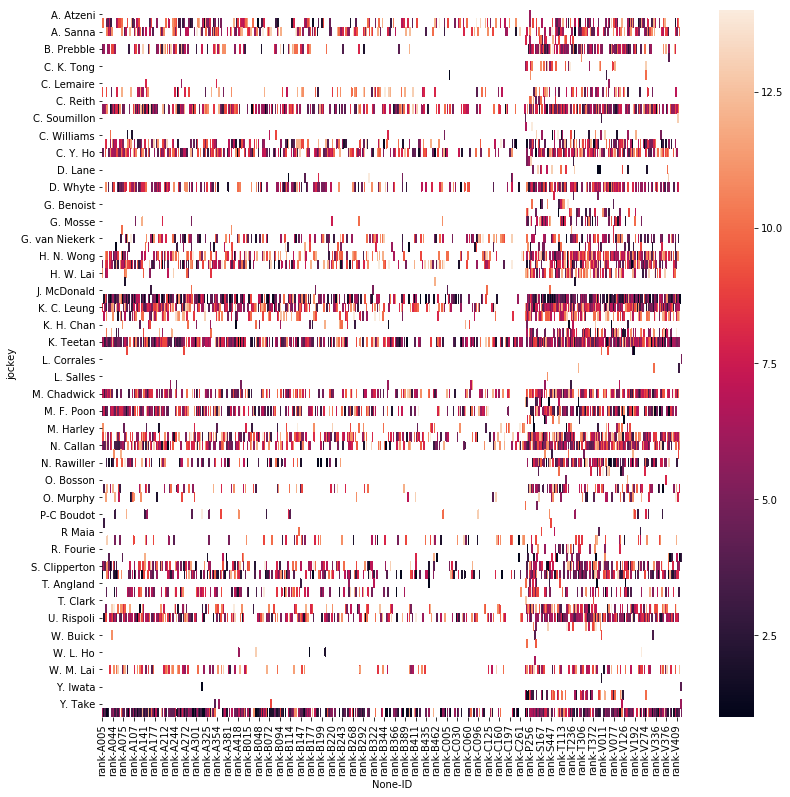

In [12]:
pivot_by_jockey = filtered_hk[['ID', 'jockey', 'rank']].pivot_table(index='jockey', columns='ID')
plt.figure(figsize=(13,13))
sns.heatmap(pivot_by_jockey)

While it would be nice to see, creating a readable heatmap for a number of combintions this large quickly proves to be illegible.  Below I attempt an example based on a much smaller sample size just to demonstrate what a heatmap would look like with our data and the kind of comparisons we will be doing in the future. 

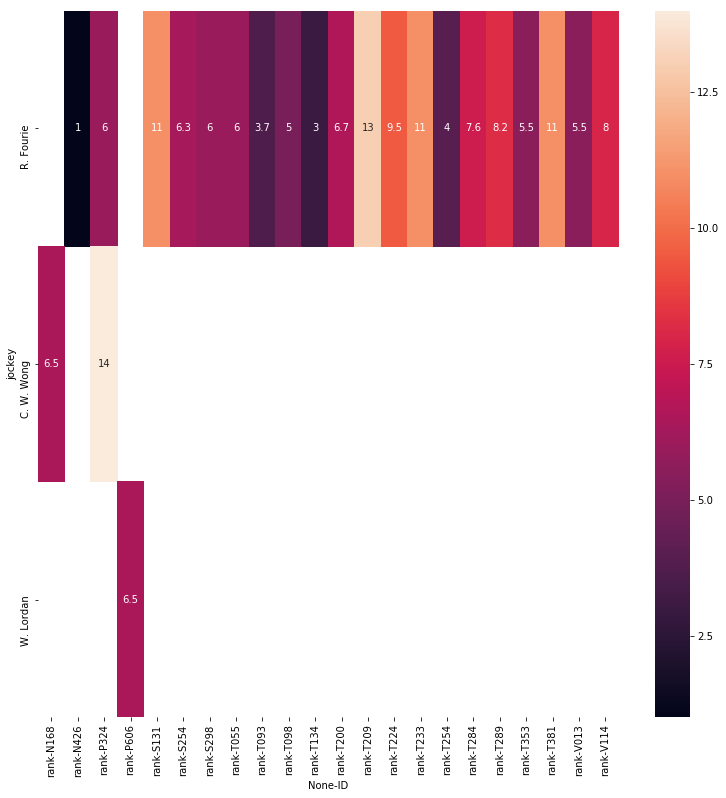

In [17]:
pivot_by_jockey_1 = pivot_by_jockey.sample(3) 
pivot_by_jockey_1 = pivot_by_jockey_1.dropna(axis = 1, how = 'all')
plt.figure(figsize=(13,13))
sns.heatmap(pivot_by_jockey_1, annot=True)